In [1]:
import pandas as pd
import numpy as np
import os

In [8]:
data = pd.read_csv("updated_lengthofstay.csv")
data.head()

,eid,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,...,bmi,pulse,respiration,secondary diagnosis nonicd9,discharged,facid,month,day,year,lengthofstay
0,1,0,F,0,0,0,0,0,0,0,...,30.432418,96,6.5,4,9/1/2012,B,8,29,2012,3
1,2,5,F,0,0,0,0,0,0,0,...,28.460516,61,6.5,1,6/2/2012,A,5,26,2012,7
2,3,1,F,0,0,0,0,0,0,0,...,28.843812,64,6.5,2,9/25/2012,B,9,22,2012,3
3,4,0,F,0,0,0,0,0,0,0,...,27.959007,76,6.5,1,8/10/2012,A,8,9,2012,1
4,5,0,F,0,0,0,1,0,1,0,...,30.258927,67,5.6,2,12/24/2012,E,12,20,2012,4


In [7]:
for col in ['month', 'day', 'year']:
    data.insert(data.columns.get_loc('lengthofstay'),col,data.pop(col))
    data.to_csv("updated_lengthofstay.csv", index=False)

In [6]:
print(data.columns)

Index(['eid', 'rcount', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef',
       'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondary  diagnosis nonicd9',
       'discharged', 'facid', 'lengthofstay', 'month', 'day', 'year'],
      dtype='object')


In [4]:
data["vdate"] = pd.to_datetime(data["vdate"])
data["month"] = data["vdate"].dt.month
data["day"] = data["vdate"].dt.day
data["year"] = data["vdate"].dt.year
data.drop(columns= ["vdate"], inplace=True)
data.to_csv("updated_data.csv", index=False)

In [4]:
len(data)

100000

In [5]:
print(data)

          eid       vdate rcount gender  dialysisrenalendstage  asthma  \
0           1   8/29/2012      0      F                      0       0   
1           2   5/26/2012      5      F                      0       0   
2           3   9/22/2012      1      F                      0       0   
3           4    8/9/2012      0      F                      0       0   
4           5  12/20/2012      0      F                      0       0   
...       ...         ...    ...    ...                    ...     ...   
99995   99996   1/28/2012      3      M                      0       0   
99996   99997    8/6/2012      0      M                      0       0   
99997   99998   7/23/2012      1      M                      0       0   
99998   99999  12/19/2012      0      M                      0       0   
99999  100000    3/6/2012      0      F                      0       0   

       irondef  pneum  substancedependence  psychologicaldisordermajor  ...  \
0            0      0           

In [6]:
data.describe()

,eid,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondary diagnosis nonicd9,lengthofstay
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,50000.500000,0.036420,0.035270,0.094940,0.039450,0.063060,0.239040,0.051660,0.049390,0.004790,...,10.177455,137.891397,141.963384,14.097185,1.099350,29.805759,73.444720,6.493768,2.123310,4.00103
std,28867.657797,0.187334,0.184462,0.293134,0.194664,0.243072,0.426499,0.221341,0.216682,0.069044,...,5.353131,2.999669,29.992996,12.952454,0.200262,2.003769,11.644555,0.568473,2.050641,2.36031
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,124.912632,-1.005927,1.000000,0.219770,21.992683,21.000000,0.200000,0.000000,1.00000
25%,25000.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,135.871062,121.682383,11.000000,0.964720,28.454235,66.000000,6.500000,1.000000,2.00000
50%,50000.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.400000,137.887151,142.088545,12.000000,1.098764,29.807516,73.000000,6.500000,1.000000,4.00000
75%,75000.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.500000,139.912885,162.180996,14.000000,1.234867,31.156885,81.000000,6.500000,3.000000,6.00000
max,100000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,245.900000,151.387283,271.444277,682.500000,2.035202,38.935293,130.000000,10.000000,10.000000,17.00000


In [7]:
import matplotlib.pyplot as plt

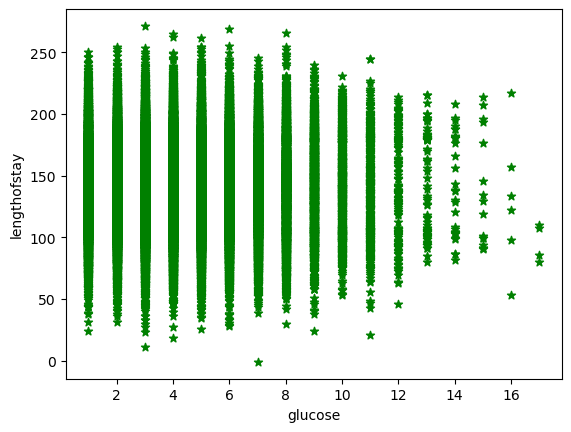

In [8]:
plt.xlabel('glucose')
plt.ylabel('lengthofstay')
plt.scatter(data['lengthofstay'], data['glucose'], color="green", marker='*')

In [9]:
print(data.columns)

Index(['eid', 'vdate', 'rcount', 'gender', 'dialysisrenalendstage', 'asthma',
       'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor',
       'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo',
       'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro',
       'creatinine', 'bmi', 'pulse', 'respiration',
       'secondary  diagnosis nonicd9', 'discharged', 'facid', 'lengthofstay'],
      dtype='object')


In [10]:
data["vdate"] = pd.to_datetime(data["vdate"])
data["year"] = data["vdate"].dt.year
data["month"] = data["vdate"].dt.month
data["day"] = data["vdate"].dt.day
data.drop(columns= ["vdate"], inplace=True)
#data.to_csv("updated_data.csv", index=False)

In [11]:
print(data.columns)

Index(['eid', 'rcount', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef',
       'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondary  diagnosis nonicd9',
       'discharged', 'facid', 'lengthofstay', 'year', 'month', 'day'],
      dtype='object')


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(x_train, y_train)
print(model.coef_)
print(model.intercept_)
y_pred = model.predict(x_test)
print(y_pred)
mean_squared_error(y_test, y_pred)
r2_score(y_test, y_pred)

NameError: name 'x_train' is not defined